# Uebung 1

# 2) Datenvorverarbeitung

Laden der benötigten Module:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import zipfile 

## a) Entpacken der Datenbank

Die zip gepackte Datenbank entpacken und die JSON Daten extrahieren:

In [12]:
import json
url = 'foods-2011-10-03.json.zip'
file = zipfile.ZipFile(url)
file.extractall()
data = open(file.namelist()[0])
foods = json.load(data)

## b) Hierarchische Struktur in einheuitliche Tabelle umwandeln

Ausgabe eines beliebigen Nahrungsmittels:

In [13]:
foods[123].keys()

dict_keys(['manufacturer', 'id', 'description', 'nutrients', 'group', 'tags', 'portions'])

Ausgabe des ersten Nährstoffe des oben gewählten Nahrungsmittels:

In [18]:
foods[123]['nutrients'][0]

{'description': 'Protein', 'group': 'Composition', 'units': 'g', 'value': 1.8}

Erstellen eines eigenen Panda DataFrame für die Felder 'description', 'group', 'id' und 'manufacturer'.

In [23]:
info = pd.DataFrame.from_dict(foods).drop('nutrients', 1).drop('tags', 1).drop('portions', 1)
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


Erstellen eines DataFrame Arrays für die Nährwerte und zusammenfügen zu einem großen DataFrame mit 389355 Einträgen:

In [51]:
nutrientsArray = []

for food in foods:
    df = pd.DataFrame.from_dict(food['nutrients'])
    df['id'] = food['id']
    nutrientsArray.append(df)

nutrients = pd.concat(nutrientsArray)
np.shape(nutrients)

(389355, 5)

Überprüfen ob es doppelte Einträge gibt:

In [52]:
nutrients.duplicated().any()

True

Entfernen der Duplikate:

In [53]:
nutrients = nutrients.drop_duplicates()
np.shape(nutrients)

(375176, 5)

Umbennen der Spalten 'description' und 'group' in einen eindeutigen Namen der in info noch nicht vergeben ist:

In [55]:
print('info Keys: '+ str(info.keys()))
print('nutrients Keys: ' + str(nutrients.keys()))

nutrients = nutrients.rename(columns = {'description': 'nutrients_description', 'group': 'nutrients_group'})

print('nutrients new Keys: ' + str(nutrients.keys()))

info Keys: Index(['description', 'group', 'id', 'manufacturer'], dtype='object')
nutrients Keys: Index(['description', 'group', 'units', 'value', 'id'], dtype='object')
nutrients new Keys: Index(['nutrients_description', 'nutrients_group', 'units', 'value', 'id'], dtype='object')


Vereinige die DataFrames 'info' und 'nutrient' mit Hilfe von Pandas merge:

In [57]:
db = pd.merge(nutrients, info, on='id', how='outer')
db.head()

,nutrients_description,nutrients_group,units,value,id,description,group,manufacturer
0,Protein,Composition,g,25.18,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.20,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.06,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.28,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.00,1008,"Cheese, caraway",Dairy and Egg Products,


## Untersuchung des Spurenelements Zink ('Zinc, Zn')

Lese alle Tabelleneinträge die einen Eintrag zum Nährstoff Zink etwas enthalten.

In [59]:
zinc = db.loc[db['nutrients_description'] == 'Zinc, Zn']
zinc.head()

,nutrients_description,nutrients_group,units,value,id,description,group,manufacturer
14,"Zinc, Zn",Elements,mg,2.94,1008,"Cheese, caraway",Dairy and Egg Products,
75,"Zinc, Zn",Elements,mg,3.11,1009,"Cheese, cheddar",Dairy and Egg Products,
151,"Zinc, Zn",Elements,mg,3.75,1018,"Cheese, edam",Dairy and Egg Products,
222,"Zinc, Zn",Elements,mg,2.88,1019,"Cheese, feta",Dairy and Egg Products,
293,"Zinc, Zn",Elements,mg,2.76,1028,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,


Zeichnung eines Histograms das den Zinkgehalt in mg anzeigt:

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['info']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb38e94e7f0>]], dtype=object)

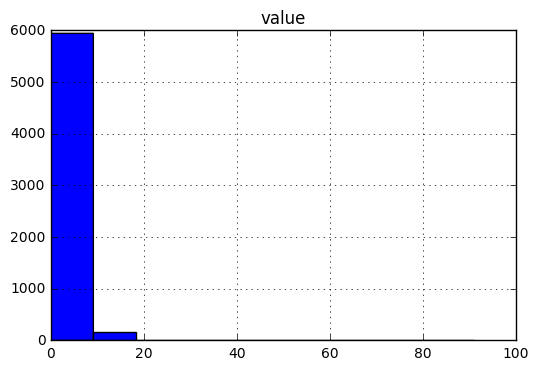

In [60]:
%pylab inline
zinc.hist(column='value')

Deskriptive Statistiken:

In [62]:
zinc['value'].describe()

count    6137.000000
mean        2.228589
std         3.975321
min         0.000000
25%         0.340000
50%         0.980000
75%         2.980000
max        90.950000
Name: value, dtype: float64